In [20]:
PATH_PREFIX = '../../../'
import sys
sys.path.append(PATH_PREFIX)

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import math
import yaml
import csv
from utils.plot import *
from utils.fitness_controller import FitnessController
from compress_optim import CompressConfig, load_comp_config, fit_from_vals

In [22]:
PREC = 'f1'
SAVE_PLOTS = True
SAVE_PLOTS_LOC = os.path.join(PATH_PREFIX, 'results/graphs/mobilenet')

RANGE_FILE = os.path.join(PATH_PREFIX, f'models/mobilenet_v2/saves/mobilenet_v2_layer_perf_{PREC}_full.csv')

file_content:list[list] = []

# load file contents
if os.path.isfile(RANGE_FILE):
    with open(RANGE_FILE) as f:
        reader = csv.reader(f)
        for row in reader:
            file_content.append([])
            for item in row:
                file_content[-1].append(eval(item))

len(file_content[0])

sensitive = [(i, np.mean(np.array([x[1] for x in perf]) * 100)) for i, perf in enumerate(file_content)]
sensitive.sort(key= lambda x: x[1])
sensitive = [x[0] for x in sensitive]
sensitive[:5]

[49, 1, 50, 41, 7]

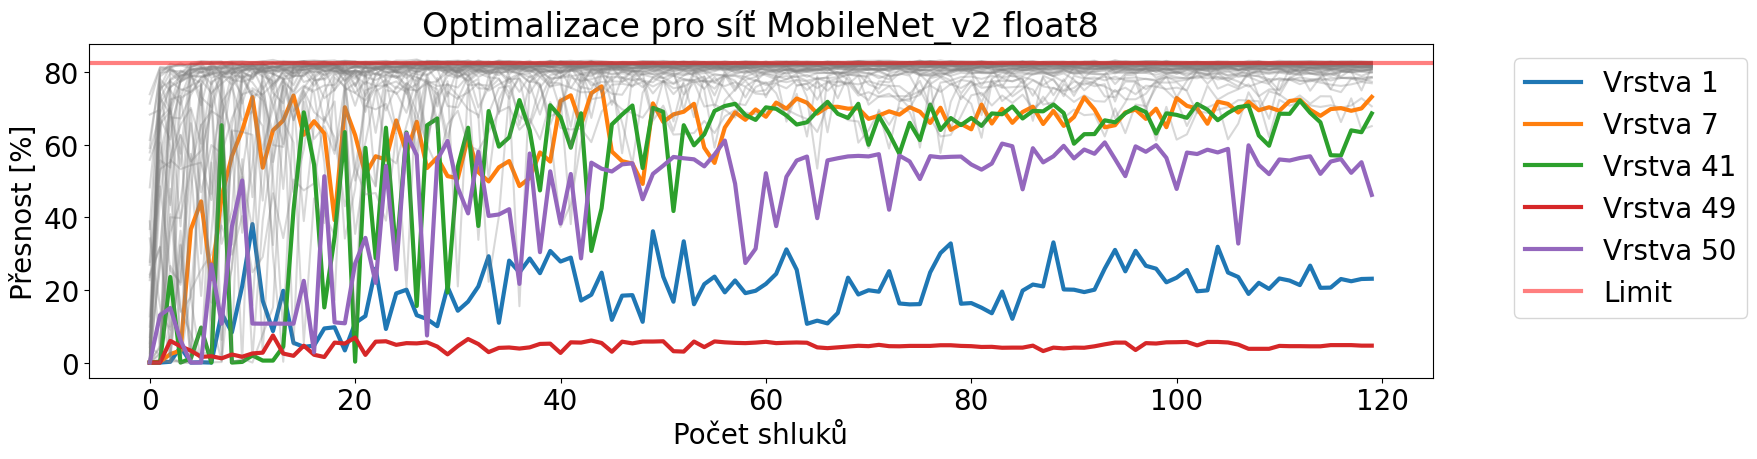

In [23]:
plt.figure(figsize=(18,5))
plt.rc('font', size=20)
for i, layer in enumerate(file_content):

    if i in sensitive[:5]:
        plt.plot(np.array([x[1] for x in layer]) * 100, label=f'Vrstva {i}', linewidth=3)
    else:
        plt.plot(np.array([x[1] for x in layer]) * 100, color='gray', alpha=0.3)

plt.axhline(y=82.5, linewidth=1, color='r', alpha=0.5, label='Limit', lw=3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Počet shluků')
plt.ylabel('Přesnost [%]')
plt.title(f'Optimalizace pro síť MobileNet_v2 {"float32" if PREC == "f4" else ( "float16" if PREC == "f2" else "float8")}')
plt.tight_layout()

if SAVE_PLOTS:
    os.makedirs(os.path.join(SAVE_PLOTS_LOC, 'range_opt'), exist_ok=True)
    plt.savefig(os.path.join(SAVE_PLOTS_LOC, 'range_opt' ,f'layer_perf_{PREC}.pdf'))